## Table of content


<p dir="ltr">1- Importing libraries</p>
<p dir="ltr">2- Data Pre-processing&nbsp;</p>
<p dir="ltr">4- Data splitting into train and test</p>

<p dir="ltr">5- Model training and Model Evaluation</p>
<p dir="ltr"></p>
<ol>
    <li>KNN</li>
    <li>Logistic regression</li>
    <li>Neural Network</li>
    <li>SVM</li>
    <li>GaussianNB</li>
</ol>
<p></p>
<p>6- Model Comparison&nbsp;</p>
<p></p>

## Connect to google drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries


In [1]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from datetime import datetime

## Data Preprocessing

In [2]:
# Read dataset
# Change your dataset path
df=pd.read_csv("../controller/dataset.csv")

In [3]:
df.shape

(490567, 28)

In [4]:
print(df['label'].value_counts())

label
1    279155
0    211412
Name: count, dtype: int64


In [15]:
#Unique values in the Label target column
# df.loc[:,'label'].unique()
# # Replace dots in IP addresses to convert to numerical representation
# df['flow_id'] = df['flow_id'].str.replace('.', '')
# df['ip_src'] = df['ip_src'].str.replace('.', '')
# df['ip_dst'] = df['ip_dst'].str.replace('.', '')

In [12]:
df.columns.to_list()

['flow_duration_sec',
 'flow_duration_nsec',
 'idle_timeout',
 'hard_timeout',
 'flags',
 'packet_count',
 'byte_count',
 'packet_count_per_second',
 'packet_count_per_nsecond',
 'byte_count_per_second',
 'byte_count_per_nsecond',
 'avg_packet_size',
 'flow_duration_total',
 'idle_mean',
 'idle_std',
 'idle_max',
 'idle_min',
 'label']

In [5]:
# Xóa các cột không cần thiết hoặc không phù hợp cho mô hình
df = df.drop(['timestamp', 'datapath_id', 'flow_id', 'ip_src', 'ip_dst', 'tp_src', 'tp_dst', 'ip_proto', 'icmp_code', 'icmp_type'], axis=1)

In [6]:
# Count missing value for each feature
print(df.isna().sum())

flow_duration_sec           0
flow_duration_nsec          0
idle_timeout                0
hard_timeout                0
flags                       0
packet_count                0
byte_count                  0
packet_count_per_second     0
packet_count_per_nsecond    0
byte_count_per_second       0
byte_count_per_nsecond      0
avg_packet_size             0
flow_duration_total         0
idle_mean                   0
idle_std                    0
idle_max                    0
idle_min                    0
label                       0
dtype: int64


## Data splitting into train and test

In [7]:
# Split data into features and target variable
X = df.drop('label', axis=1).values.astype(float)
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardized data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (367925, 17)
The test dataset size =  (122642, 17)


# ----------------------------Training the model--------------------------------

### Model Evaluation

In [8]:
# Function to evaluate model
def evaluate_model(y_true, y_pred, start_time, end_time):
    acc = accuracy_score(y_true, y_pred)
    print("Success accuracy = {0:.2f} %".format(acc*100))
    fail = 1.0 - acc
    print("Fail accuracy = {0:.2f} %".format(fail*100))
    training_time = end_time - start_time
    #hours, rem = divmod(training_time.seconds, 3600)
    #minutes, seconds = divmod(rem, 60)
    print(f"Training time: {training_time}")
    return acc, fail, training_time

# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


### Traning model

Evaluate KNN Model
Success accuracy = 94.73 %
Fail accuracy = 5.27 %
Training time: 0:01:08.293490


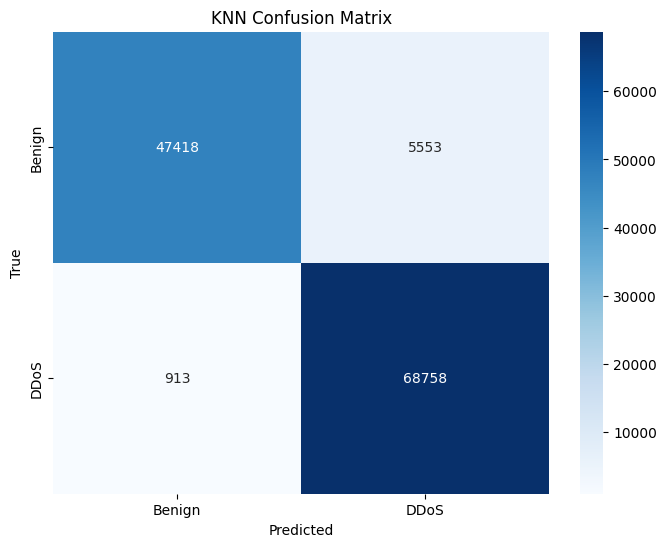

Evaluate Logistic Regression Model
Success accuracy = 89.21 %
Fail accuracy = 10.79 %
Training time: 0:00:01.383738


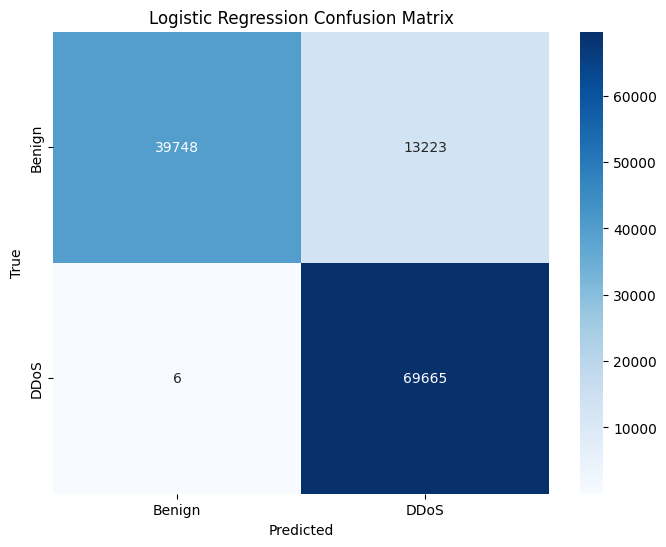

Evaluate Neural Network Model


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Success accuracy = 89.35 %
Fail accuracy = 10.65 %
Training time: 0:00:10.700994


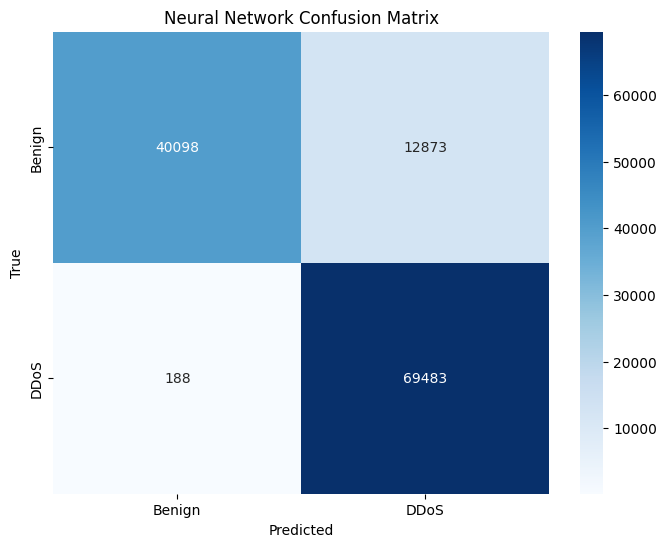

Evaluate SVM Model


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Success accuracy = 82.57 %
Fail accuracy = 17.43 %
Training time: 0:01:00.683554


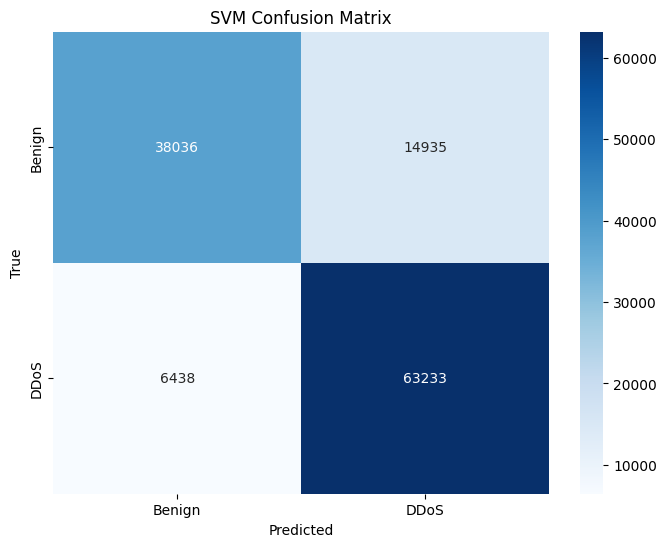

Evaluate GaussianNB Model
Success accuracy = 88.90 %
Fail accuracy = 11.10 %
Training time: 0:00:00.234445


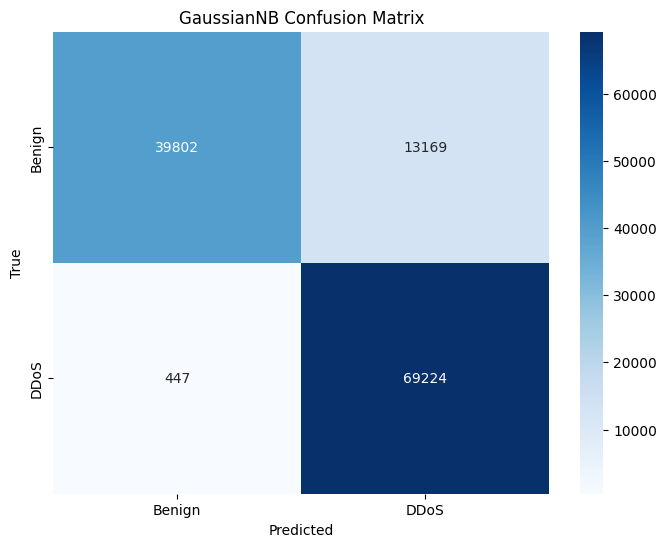

In [9]:
# Evaluate different models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(5,), max_iter=20, random_state=42, solver='sgd'),
    #'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5),  # Overfitting
    # 'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5),  # Overfitting
    'SVM': SVC(max_iter=1000),
    'GaussianNB': GaussianNB()
}

results = []

for model_name, model in models.items():
    print(f"Evaluate {model_name} Model")
    start_time = datetime.now()
    try:
        model.fit(X_train, y_train)
    except Exception as e:
        print(f"Error while fitting {model_name}: {e}")
        continue
    y_pred = model.predict(X_test)
    end_time = datetime.now()
    acc, fail, training_time = evaluate_model(y_test, y_pred, start_time, end_time)
    results.append({
        'Model': model_name,
        'Success Accuracy': acc*100,
        'Fail Accuracy': fail*100,
        'Training Time': training_time.total_seconds()
    })
    plot_confusion_matrix(y_test, y_pred, ['Benign', 'DDoS'], f'{model_name} Confusion Matrix')

## Model Comparison

                 Model  Success Accuracy  Fail Accuracy  Training Time
0                  KNN         94.727744       5.272256      68.293490
1  Logistic Regression         89.213320      10.786680       1.383738
2       Neural Network         89.350304      10.649696      10.700994
3                  SVM         82.572854      17.427146      60.683554
4           GaussianNB         88.897767      11.102233       0.234445


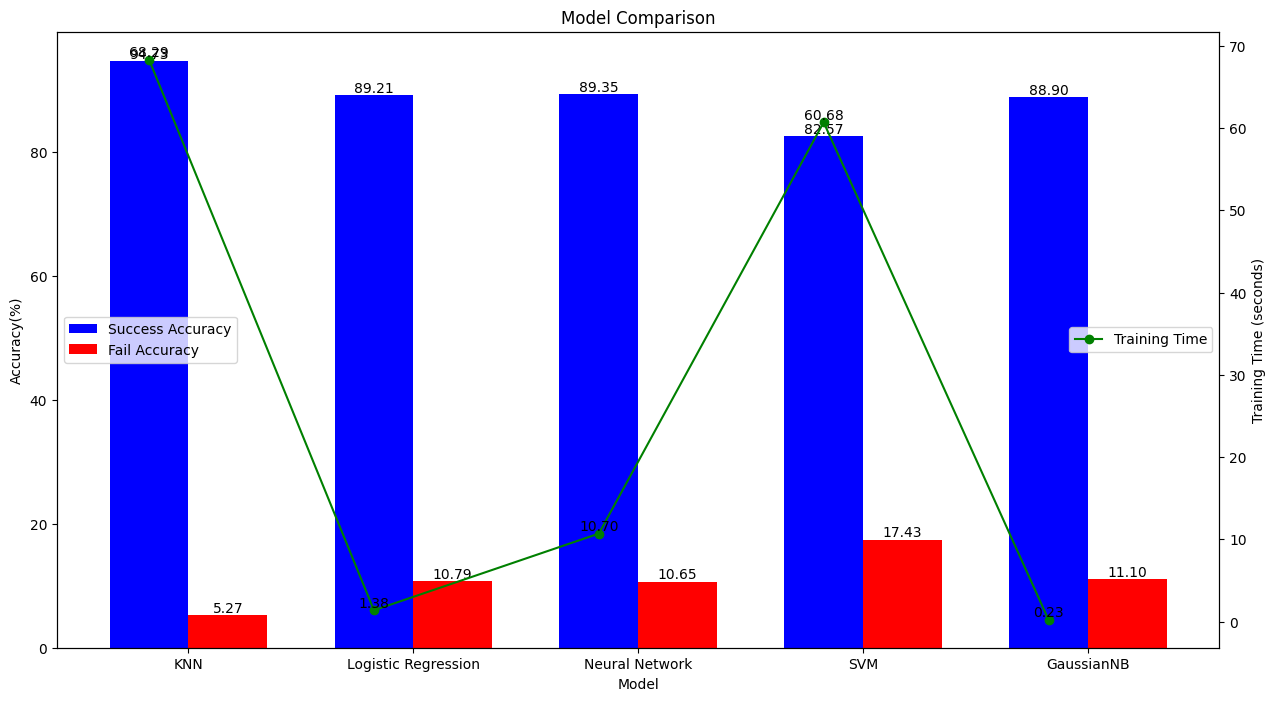

In [10]:
def compare_models(results):
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Plotting the results
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Bar plot for Success Accuracy and Fail Accuracy
    bar_width = 0.35
    index = np.arange(len(results_df['Model']))
    bar1 = ax1.bar(index, results_df['Success Accuracy'], bar_width, label='Success Accuracy', color='blue')
    bar2 = ax1.bar(index + bar_width, results_df['Fail Accuracy'], bar_width, label='Fail Accuracy', color='red')

    ax1.set_xlabel('Model')
    ax1.set_ylabel('Accuracy(%)')
    ax1.set_title('Model Comparison')
    ax1.set_xticks(index + bar_width / 2)
    ax1.set_xticklabels(results_df['Model'])
    ax1.legend()

    # Adding labels on bars
    for rect in bar1 + bar2:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    ax1.legend(loc='center left')
    # Line plot for Training Time
    ax2 = ax1.twinx()
    ax2.set_ylabel('Training Time (seconds)')
    line = ax2.plot(results_df['Model'], results_df['Training Time'], color='green', marker='o', label='Training Time')

    # Adding labels on line plot
    for x, y in zip(index, results_df['Training Time']):
        ax2.text(x, y, f'{y:.2f}', ha='center', va='bottom')

    ax2.legend(loc='center right')

    plt.show()

results_df = pd.DataFrame(results)
print(results_df)
compare_models(results)